In [5]:
import pandas as pd
import pykrev as pk
import numpy as np
import seaborn as sns
from sklearn import decomposition
from matplotlib import pyplot as plt
import missingno as msno
from matplotlib.lines import Line2D
import math
import time
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
from pandas.plotting import table # EDIT: see deprecation warnings below



In [2]:
#read the ordination data 
ordinationData = pd.read_csv("../ordination/333_ordination.csv",index_col=0)

In [10]:
ordinationData

,NS00089894,NS00097320,NS00048518,NS00070313,NS00039803,NS00051698,NS00053493,NS00002961,NS00013020,NS00003118,...,NS00043267,NS00098038,NS00016028,NS00044908,NS00092501,NS00001741,NS00014251,NS00096012,NS00006034,NS00064737
19139,7977.047040,NaN,NaN,NaN,NaN,NaN,186197.263579,137679.360000,133609.232842,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,570809.390667,NaN,...,NaN,NaN,NaN,NaN,29512.700000,NaN,NaN,NaN,NaN,NaN
19877,NaN,NaN,NaN,NaN,NaN,NaN,11414.797333,NaN,65540.825778,NaN,...,NaN,NaN,NaN,NaN,18680.809500,NaN,NaN,NaN,NaN,NaN
19960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229984.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68839.717429,NaN,...,NaN,NaN,NaN,NaN,15947.232000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129190.498462,NaN,...,NaN,NaN,NaN,NaN,37243.154667,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89536.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76967.498364
21545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30804.867862,134258.019840,NaN,...,NaN,NaN,NaN,NaN,22611.709241,NaN,229733.523111,NaN,NaN,NaN
21517,37680.766444,85762.9696,NaN,NaN,NaN,NaN,NaN,177101.682353,248137.261926,NaN,...,NaN,NaN,NaN,NaN,211654.540800,NaN,NaN,NaN,NaN,NaN


In [13]:
ordinationData.iloc[0:10,0:10].head()

,NS00089894,NS00097320,NS00048518,NS00070313,NS00039803,NS00051698,NS00053493,NS00002961,NS00013020,NS00003118
19139,7977.04704,NaN,NaN,NaN,NaN,NaN,186197.263579,137679.36,133609.232842,NaN
19162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,570809.390667,NaN
19877,NaN,NaN,NaN,NaN,NaN,NaN,11414.797333,NaN,65540.825778,NaN
19960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229984.000000,NaN
19999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68839.717429,NaN


In [3]:
ordinationData.head()

,NS00089894,NS00097320,NS00048518,NS00070313,NS00039803,NS00051698,NS00053493,NS00002961,NS00013020,NS00003118,...,NS00043267,NS00098038,NS00016028,NS00044908,NS00092501,NS00001741,NS00014251,NS00096012,NS00006034,NS00064737
19139,7977.04704,NaN,NaN,NaN,NaN,NaN,186197.263579,137679.36,133609.232842,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,570809.390667,NaN,...,NaN,NaN,NaN,NaN,29512.7000,NaN,NaN,NaN,NaN,NaN
19877,NaN,NaN,NaN,NaN,NaN,NaN,11414.797333,NaN,65540.825778,NaN,...,NaN,NaN,NaN,NaN,18680.8095,NaN,NaN,NaN,NaN,NaN
19960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229984.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68839.717429,NaN,...,NaN,NaN,NaN,NaN,15947.2320,NaN,NaN,NaN,NaN,NaN


In [17]:
#read the metadata
metaData = pd.read_csv("../metadata/333_metadata.csv",index_col=0)

In [18]:
metaData.head()

,ID,Collection,Sample type,Short name for contribution,Sampling date,Analysis date,Instrument setup used,Monitored City,Monitored country,Latitude,...,Number of orgnanisms,Origin of biota,Proxy pressures,River basin name,Size (mm),Species group,Tissue,Water content(%),Weight (kg),field_country
0,37,LIFE APEX,Real Sample,LIFE APEX 01 Bream muscle from Danube Jochenstein,"Thu, 01/01/2015 - 00:00","Wed, 01/01/2020 - 00:00",LC-Bruker maXis QTOF: Submission #10,Jochenstein,NaN,51.83,...,NaN,River,NaN,Danube river basin,NaN,NaN,Muscle,NaN,NaN,Germany
1,38,LIFE APEX,Real Sample,LIFE APEX 02 Bream muscle from Elbe,"Thu, 01/01/2015 - 00:00","Wed, 01/01/2020 - 00:00",LC-Bruker maXis QTOF: Submission #10,Wittenberge,Germany,53.01,...,NaN,River,NaN,Elbe river basin,NaN,NaN,Muscle,NaN,NaN,Germany
2,39,LIFE APEX,Real Sample,LIFE APEX 03 Bream muscle from Rhine Bimmen,"Thu, 01/01/2015 - 00:00","Wed, 01/01/2020 - 00:00",LC-Bruker maXis QTOF: Submission #10,Emmerich,Germany,51.85,...,NaN,River,NaN,Rhine river basin,NaN,NaN,Muscle,NaN,NaN,Germany
3,40,LIFE APEX,Real Sample,LIFE APEX 04 Bream muscle from Belauer See,"Thu, 01/01/2015 - 00:00","Wed, 01/01/2020 - 00:00",LC-Bruker maXis QTOF: Submission #10,Neumunster,Germany,54.07,...,NaN,River,NaN,NaN,NaN,NaN,Muscle,NaN,NaN,Germany
4,41,LIFE APEX,Real Sample,LIFE APEX 05 Bream muscle from Saar Gudingen,"Thu, 01/01/2015 - 00:00","Thu, 01/01/2015 - 00:00",LC-Bruker maXis QTOF: Submission #10,Saarbrucken,Germany,49.25,...,NaN,River,NaN,Rhine river basin,NaN,NaN,Muscle,NaN,NaN,Germany


In [123]:
#create an empty dataframe to make the pca plots in
plotData = pd.DataFrame()
plotData['sample_id'] = ordinationData.index
plotData = pd.merge(plotData,metaData, how='left', left_on='sample_id', right_on='ID')

In [124]:
#filter out empty or completely full columns
N = ordinationData.shape[0]
P = 0.4 # the required proportion of data
M = int(np.floor(N * P)) #the minimum number of recorded values for a sample (round down)
U =  int(np.ceil(N * (1-P))) #the maximum number of recorded values for a sample (round up)
print(M,U,M+U,N)
boolA = (ordinationData.notnull().sum(axis=0) >= M) & (ordinationData.notnull().sum(axis=0) <= U)
filterData = ordinationData.loc[:,boolA]
C = filterData.shape[1]
columns = filterData.columns


165 248 413 413


In [125]:
#figure out how many pairwise combinations are possible 
C_combinations = math.factorial(C)/(2*math.factorial(C-2))
shuffles = C_combinations/C
#figure out how many times you need to shuffle the isnull matrix, round up 
shuffles = int(np.round(shuffles))

In [126]:
notnull = np.array(filterData.notnull(),dtype=int)
notnull_shift = np.array(filterData.notnull(),dtype=int)
exclusives = set()
tic = time.time()
for i in range (0,shuffles):
    notnull_shift = np.concatenate((notnull_shift[:, -1:], notnull_shift[:, :-1]), axis=1)
    boolB = np.max(notnull + notnull_shift,axis=0) == 1
    exclusives.update(columns[boolB])
toc = time.time()
print(toc-tic)


18.29920196533203


In [161]:
filterData.shape

(413, 5314)

In [162]:
ordinationData.shape

(413, 56248)

In [127]:
exclusiveData = ordinationData.loc[:,list(exclusives)]

In [134]:
exclusiveData

,NS00010591,NS00069026,NS00089252,NS00001048,NS00051247,NS00029751,NS00064839,NS00022775,NS00013576,NS00056626,...,NS00065576,NS00091206,NS00068723,NS00029419,NS00102505,NS00043495,NS00059985,NS00025022,NS00003568,NS00071658
19139,868986.482667,NaN,NaN,567981.860352,1.956752e+06,205472.553055,NaN,NaN,2.397721e+05,4.103808e+05,...,NaN,NaN,331619.631812,NaN,689196.195284,6.755644e+05,NaN,80859.078667,25901.682353,78593.452667
19162,NaN,NaN,1.967917e+05,NaN,NaN,NaN,21896.334212,27999.975000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19877,NaN,NaN,2.220027e+05,NaN,NaN,NaN,45450.781630,12611.119259,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19960,768431.941964,393142.207733,NaN,NaN,3.259423e+06,16304.494061,NaN,NaN,3.292556e+06,NaN,...,92819.043148,6.528000e+03,399504.993750,393142.207733,19783.361806,1.039440e+05,312904.939886,399504.993750,28281.777600,45630.219741
19999,NaN,NaN,1.464522e+04,NaN,NaN,NaN,66118.374000,27408.682800,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21529,NaN,NaN,1.993742e+05,NaN,NaN,NaN,NaN,141621.704000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,287640.919059,NaN,NaN,661971.509736,1.386624e+06,65700.000000,NaN,NaN,1.532988e+06,1.886617e+06,...,162676.216744,7.024619e+06,81680.000000,NaN,NaN,1.237761e+06,463065.029189,75576.000000,232235.446275,108760.892457
21545,NaN,NaN,NaN,NaN,NaN,NaN,527759.090370,58037.437895,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21517,NaN,NaN,1.611479e+05,NaN,NaN,NaN,NaN,199526.784000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
metaData

,ID,Collection,Sample type,Short name for contribution,Sampling date,Analysis date,Instrument setup used,Monitored City,Monitored country,Latitude,...,Number of orgnanisms,Origin of biota,Proxy pressures,River basin name,Size (mm),Species group,Tissue,Water content(%),Weight (kg),field_country
0,37,LIFE APEX,Real Sample,LIFE APEX 01 Bream muscle from Danube Jochenstein,"Thu, 01/01/2015 - 00:00","Wed, 01/01/2020 - 00:00",LC-Bruker maXis QTOF: Submission #10,Jochenstein,NaN,51.83,...,NaN,River,NaN,Danube river basin,NaN,NaN,Muscle,NaN,NaN,Germany
1,38,LIFE APEX,Real Sample,LIFE APEX 02 Bream muscle from Elbe,"Thu, 01/01/2015 - 00:00","Wed, 01/01/2020 - 00:00",LC-Bruker maXis QTOF: Submission #10,Wittenberge,Germany,53.01,...,NaN,River,NaN,Elbe river basin,NaN,NaN,Muscle,NaN,NaN,Germany
2,39,LIFE APEX,Real Sample,LIFE APEX 03 Bream muscle from Rhine Bimmen,"Thu, 01/01/2015 - 00:00","Wed, 01/01/2020 - 00:00",LC-Bruker maXis QTOF: Submission #10,Emmerich,Germany,51.85,...,NaN,River,NaN,Rhine river basin,NaN,NaN,Muscle,NaN,NaN,Germany
3,40,LIFE APEX,Real Sample,LIFE APEX 04 Bream muscle from Belauer See,"Thu, 01/01/2015 - 00:00","Wed, 01/01/2020 - 00:00",LC-Bruker maXis QTOF: Submission #10,Neumunster,Germany,54.07,...,NaN,River,NaN,NaN,NaN,NaN,Muscle,NaN,NaN,Germany
4,41,LIFE APEX,Real Sample,LIFE APEX 05 Bream muscle from Saar Gudingen,"Thu, 01/01/2015 - 00:00","Thu, 01/01/2015 - 00:00",LC-Bruker maXis QTOF: Submission #10,Saarbrucken,Germany,49.25,...,NaN,River,NaN,Rhine river basin,NaN,NaN,Muscle,NaN,NaN,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,21592,LIFE APEX,Real Sample,LIFE APEX 02 Bream muscle from Elbe,"Thu, 01/01/2015 - 22:00","Thu, 11/27/2014 - 22:00",LC-Bruker maXis QTOF: Submission #10,Wittenberge,Germany,53.01,...,NaN,Coastal region,NaN,Elbe river basin,NaN,Fish (22486),Muscel,NaN,NaN,Germany
432,21593,LIFE APEX,Real Sample,LIFE APEX 01 Bream muscle from Danube Jochenstein,"Thu, 01/01/2015 - 22:00","Thu, 11/27/2014 - 22:00",LC-Bruker maXis QTOF: Submission #11,Dessau,Germany,51.83,...,NaN,Coastal region,NaN,Danube river basin,NaN,Fish (22486),Muscel,NaN,NaN,Germany
433,21594,LIFE APEX,Real Sample,LIFE APEX 01 Bream muscle from Danube Jochenstein,"Thu, 01/01/2015 - 22:00","Thu, 11/27/2014 - 22:00",LC-Bruker maXis QTOF: Submission #10,Dessau,Germany,51.83,...,NaN,Coastal region,NaN,Danube river basin,NaN,Fish (22486),Muscel,NaN,NaN,Germany
434,21595,LIFE APEX,Blank Sample,Procedural Blank for LIFE APEX Tier 1 Batch 1,"Thu, 01/01/2015 - 22:00","Thu, 11/27/2014 - 22:00",LC-Bruker maXis QTOF: Submission #11,Berlin,Germany,52.52,...,NaN,Coastal region,NaN,NaN,NaN,Other (22510),Other,NaN,NaN,Germany


In [129]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(exclusiveData.notnull().transpose())


/home/ezrkit/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [130]:

# Sort columns based on cluster membership 
sorted_indices = np.argsort(clusters)
sorted_matrix = exclusiveData.iloc[:, sorted_indices]


In [131]:
clusterCSV = pd.DataFrame({"compounds":exclusiveData.columns,"cluster":clusters})
clusterCSV

,compounds,cluster
0,NS00010591,0
1,NS00069026,0
2,NS00089252,1
3,NS00001048,0
4,NS00051247,0
...,...,...
987,NS00043495,0
988,NS00059985,0
989,NS00025022,0
990,NS00003568,0


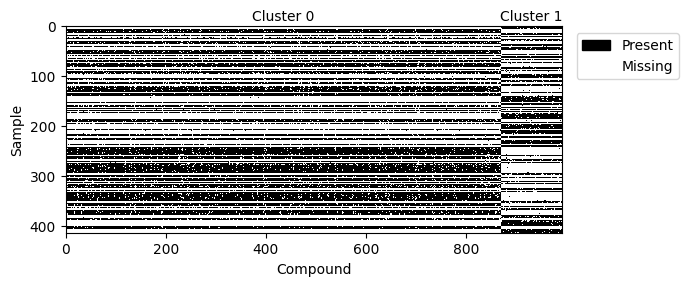

In [132]:
plt.imshow(sorted_matrix.isnull(),cmap='gray', interpolation='None')
plt.xlabel('Compound')
plt.ylabel('Sample')
black_patch = mpatches.Patch(color='black', label='Present')
white_patch = mpatches.Patch(color='white', label='Missing')
plt.legend(handles=[black_patch, white_patch], bbox_to_anchor=(1.25,1))


# Define the number of columns for each label
X = sum(clusters == 0)
N = sum(clusters == 1)

#brackets grouping columns
# Add labels with flipped brackets grouping columns and raise them above the plot
plt.text(X/2 - 0.5, -20, 'Cluster 0', ha='center', va='center', fontsize=10)
plt.text(X + N/2 - 0.5, -20, 'Cluster 1', ha='center', va='center', fontsize=10)

# Show the plot
plt.show()

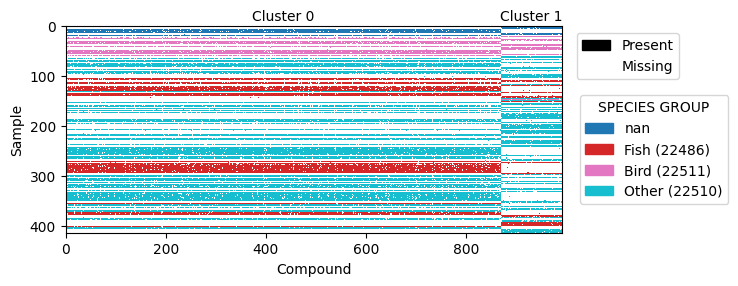

In [ ]:
# Create a color map for the species groups
species_groups = metaData['Species group'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(species_groups)))

# Create a color dictionary for species groups
color_dict = {species_groups[i]: colors[i] for i in range(len(species_groups))}

# Create a matrix to hold the colors
colored_matrix = np.empty(shape=(sorted_matrix.shape[0],sorted_matrix.shape[1],3))

# Apply colors to the matrix based on species group
for i in range(sorted_matrix.shape[0]):
    for j in range(sorted_matrix.shape[1]):
        if pd.notnull(sorted_matrix.iloc[i, j]):
            colored_matrix[i, j, 0] = color_dict[metaData['Species group'][i]][0]
            colored_matrix[i, j, 1] = color_dict[metaData['Species group'][i]][1]
            colored_matrix[i, j, 2] = color_dict[metaData['Species group'][i]][2]
        else:
            colored_matrix[i, j, 0] = 1
            colored_matrix[i, j, 1] = 1
            colored_matrix[i, j, 2] = 1

# Plot the matrix with the categorical colors
plt.imshow(colored_matrix, interpolation='None')
plt.xlabel('Compound')
plt.ylabel('Sample')

# Add a legend slightly off the figure to one side
black_patch = mpatches.Patch(color='black', label='Present')
white_patch = mpatches.Patch(color='white', label='Missing')
legend1=plt.legend(handles=[black_patch, white_patch],bbox_to_anchor=(1.25, 1))

legend_patches = [mpatches.Patch(color=color_dict[group], label=group) for group in species_groups]
plt.legend(handles=legend_patches, title = 'SPECIES GROUP',bbox_to_anchor=(1.34, .7))

plt.gca().add_artist(legend1)

# Define the number of columns for each label
X = sum(clusters == 0)
N = sum(clusters == 1)

# Add labels with flipped brackets grouping columns and raise them above the plot
plt.text(X/2 - 0.5, -20, 'Cluster 0', ha='center', va='center', fontsize=10)
plt.text(X + N/2 - 0.5, -20, 'Cluster 1', ha='center', va='center', fontsize=10)

# Show the plot
plt.show()


In [160]:
metaData['Species group']

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
           ...      
431     Fish (22486)
432     Fish (22486)
433     Fish (22486)
434    Other (22510)
435    Other (22510)
Name: Species group, Length: 436, dtype: object

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.legend_handler import HandlerPatch

# Custom handler for multi-colored patch
class HandlerMultiColorPatch(HandlerPatch):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        colors = orig_handle.get_facecolor()
        patches = []
        for i, color in enumerate(colors):
            patch = mpatches.Patch(facecolor=color, edgecolor='none', transform=trans)
            patch.set_bounds(xdescent + i * width / len(colors), ydescent, width / len(colors), height)
            patches.append(patch)
        return patches

# Function to create a multi-colored patch from a color dictionary
def create_multi_color_patch(color_dict):
    colors = [color_dict[key] for key in color_dict]
    return mpatches.Patch(facecolor=colors, label='Multi-colored')


# Create a multi-colored patch
multi_color_patch = create_multi_color_patch(color_dict)

# Plot the matrix with the categorical colors
plt.figure(figsize=(12, 8))
plt.imshow(np.random.rand(10, 10, 3), interpolation='None')  # Dummy data for illustration
plt.xlabel('Compound')
plt.ylabel('Sample')

# Add the first legend
black_patch = mpatches.Patch(color='black', label='Present')
white_patch = mpatches.Patch(color='white', label='Missing')
plt.legend(handles=[black_patch, white_patch], bbox_to_anchor=(1.05, 1), loc='upper left')

# Add the second legend with the multi-colored patch
legend_patches = [multi_color_patch] + [mpatches.Patch(color=color_dict[group], label=group) for group in color_dict if group is not np.nan]
legend2 = plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 0.5), loc='upper left', handler_map={mpatches.Patch: HandlerMultiColorPatch()})
plt.gca().add_artist(legend2)

# Show the plot
plt.show()


{nan: array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 'Fish (22486)': array([0.83921569, 0.15294118, 0.15686275, 1.        ]),
 'Bird (22511)': array([0.89019608, 0.46666667, 0.76078431, 1.        ]),
 'Other (22510)': array([0.09019608, 0.74509804, 0.81176471, 1.        ])}

In [96]:
color_dict

{nan: array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 'Fish (22486)': array([0.83921569, 0.15294118, 0.15686275, 1.        ]),
 'Bird (22511)': array([0.89019608, 0.46666667, 0.76078431, 1.        ]),
 'Other (22510)': array([0.09019608, 0.74509804, 0.81176471, 1.        ])}

In [ ]:
plt.imshow(sorted_matrix.isnull(),cmap='gray', interpolation='None')
plt.xlabel('Compound')
plt.ylabel('Sample')
black_patch = mpatches.Patch(color='black', label='Present')
white_patch = mpatches.Patch(color='white', label='Missing')
plt.legend(handles=[black_patch, white_patch], bbox_to_anchor=(1.25,1))


# Define the number of columns for each label
X = sum(clusters == 0)
N = sum(clusters == 1)

#brackets grouping columns
# Add labels with flipped brackets grouping columns and raise them above the plot
plt.text(X/2 - 0.5, -20, 'Cluster 0', ha='center', va='center', fontsize=10)
plt.text(X + N/2 - 0.5, -20, 'Cluster 1', ha='center', va='center', fontsize=10)

# Show the plot
plt.show()

In [ ]:
#find columns that perfectly predict eachother, we are just going to make a set of all of the columns that exhibit this behaviour
columns = filterData.columns
isnull = np.array(filterData.isna(),dtype=int)
notnull = np.array(filterData.notnull(),dtype=int)
for idx,c in enumerate(columns): 
    if c in exclusives:
        pass
    else:
        notnulli = notnull[:,idx]
        notnulli = notnulli[:, np.newaxis]
        diff = isnull - notnulli
        if len(columns[diff.sum(axis=0) == 0]) > 0:
            exclusives.update(c)
            exclusives.update(columns[diff.sum(axis=0) == 0])

KeyboardInterrupt: 

In [71]:
#first get rid of anything thats always false or always true
sum(boolA)

5314

In [ ]:
missing = ordinationData.iloc[:, [i for i, n in enumerate(np.var(ordinationData.isnull(), axis='rows')) if n > 0]]
corr_mat = missing.isnull().corr()